In [1]:
import pandas as pd
import numpy as np

In [2]:
%cd /Users/loanple/Desktop/
whiskey=pd.read_csv("scotch_review.csv")

/Users/loanple/Desktop


In [3]:
#quick look
whiskey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
Unnamed: 0      2247 non-null int64
name            2247 non-null object
category        2247 non-null object
review.point    2247 non-null int64
price           2247 non-null object
currency        2247 non-null object
description     2247 non-null object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB


In [5]:
#observe first 5 rows
whiskey.head()

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [18]:
#observe last five row
whiskey.tail()

,Unnamed: 0,name,category,review.point,price,currency,description
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00,$,"Its best attributes are vanilla, toasted cocon..."
2243,2244,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00,$,"Aged in a sherry cask, which adds sweet notes ..."
2244,2245,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00,$,"Earthy, fleshy notes with brooding grape notes..."
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00,$,"The sherry is very dominant and cloying, which..."
2246,2247,Distillery Select 'Inchmoan' (distilled at Loc...,Single Malt Scotch,63,60.00,$,"Fiery peat kiln smoke, tar, and ripe barley on..."


In [6]:
#category by value ( how many each category)
whiskey['category'].value_counts()

Single Malt Scotch            1819
Blended Scotch Whisky          211
Blended Malt Scotch Whisky     132
Single Grain Whisky             57
Grain Scotch Whisky             28
Name: category, dtype: int64

In [16]:
# average review point for each category
grouped=whiskey.groupby('category')['review.point'].mean()
grouped

category
Blended Malt Scotch Whisky    87.659091
Blended Scotch Whisky         87.236967
Grain Scotch Whisky           86.500000
Single Grain Whisky           85.508772
Single Malt Scotch            86.608576
Name: review.point, dtype: float64

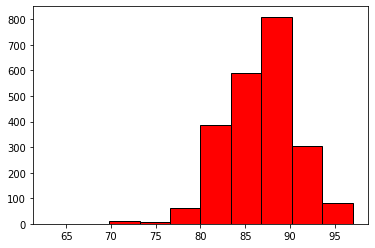

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
#create a histogram of all review.point 
whiskey['review.point'].hist(bins=10,ec='black',grid=False,color="red")

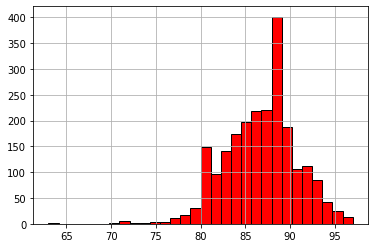

In [13]:
#create a histogram of all review.point ( different visulization than the above)
whiskey['review.point'][whiskey['review.point']<=200000].hist(bins=30,ec='black',grid=True,color="red")

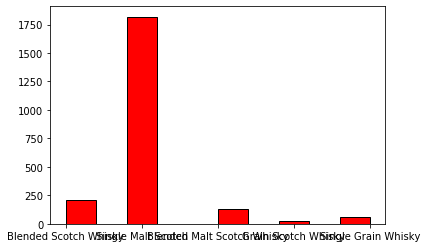

In [12]:

%matplotlib inline
import matplotlib.pyplot as plt

#let us create a histogram of all categories
whiskey['category'].hist(bins=10,ec='black',grid=False,color="red")

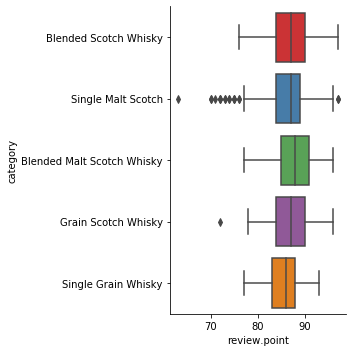

In [20]:
# visualize the distribution of category using box plots: 
import seaborn as sns
plot=sns.catplot(x='review.point',y='category',kind='box',palette='Set1', data=whiskey[whiskey['review.point']<=25000])


In [ ]:
#Text Mining Analysis

In [10]:
filenameAFINN = 'AFINN/AFINN-111.txt'

filename

afinn = dict(map(lambda (w, s): (w, int(s)), [ws.strip().split('\t') for ws in open(filenameAFINN) ]))

SyntaxError: invalid syntax (<ipython-input-10-6d7c26f73223>, line 2)

In [12]:
filenameAFINN = 'AFINN/AFINN-111.txt'

In [19]:
pip install afinn

     |████████████████████████████████| 61kB 879kB/s eta 0:00:01
  Stored in directory: /Users/loanple/Library/Caches/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn
Note: you may need to restart the kernel to use updated packages.


In [20]:
from afinn import Afinn
af=Afinn()

In [17]:
#Cleaning review variable for analysis
import re

REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

In [23]:
def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews